In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 한글 폰트 설정

# 음수 표시 설정 (깨지는 문제 방지)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
final_data_1107 = pd.read_csv('final_data_1107.csv')

In [3]:
final_data_1107

,Unnamed: 0,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,...,자택_시도,자택_시군구,승인건수_수치화,거래년월_분기,년도,가맹점업종명_범주화,연도_분기,금리,소비자심리지수,인구
0,0,2021-01-01,7779449587,1급 호텔,서울특별시,구로구,5번이하,80000,50대,여,...,경상북도,구미시,5,1,2021,인터넷P/G,2021Q1,0.5,97.8,"서울,경기 아님"
1,1,2021-01-01,9787214635,CATV홈쇼핑,서울특별시,마포구,5번이하,70000,50대,남,...,대구광역시,서구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
2,2,2021-01-01,7152642392,CATV홈쇼핑,서울특별시,서초구,5번이하,50000,40대,여,...,대구광역시,남구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
3,3,2021-01-01,9185487426,CATV홈쇼핑,서울특별시,영등포구,5번이하,30000,50대,여,...,대구광역시,북구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
4,4,2021-01-01,7836307657,CATV홈쇼핑,서울특별시,영등포구,5번이하,40000,50대,여,...,대구광역시,남구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913926,913926,2023-12-01,6419163666,화장품,서울특별시,강남구,5번이하,100000,50대,여,...,대구광역시,남구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"
913927,913927,2023-12-01,7288428245,화장품,서울특별시,영등포구,5번이하,80000,40대,남,...,대구광역시,동구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"
913928,913928,2023-12-01,9857037776,화장품,서울특별시,강남구,5번이하,90000,60대이상,여,...,대구광역시,서구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"
913929,913929,2023-12-01,7705994902,화장품,서울특별시,송파구,5번이하,200000,50대,여,...,대구광역시,서구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"


In [4]:
import pandas as pd
# 예시 데이터프레임 생성
data = final_data_1107
df = pd.DataFrame(data)
# 전체 승인금액 계산
total_spending = df['승인금액'].sum()
# 업종별 지출 합계 계산
industry_spending = df.groupby('가맹점업종명_범주화')['승인금액'].sum()
# 업종별 지출 점유율 계산
industry_spending_share = (industry_spending / total_spending) * 100
# 결과 출력
print("업종별 지출 점유율 (%):")
print(industry_spending_share)

업종별 지출 점유율 (%):
가맹점업종명_범주화
교통_및_물류       2.359263
기타           16.179078
서비스_및_여가      1.323608
소매_및_생활용품     3.207895
식생활           3.602221
인터넷P/G       73.327935
Name: 승인금액, dtype: float64


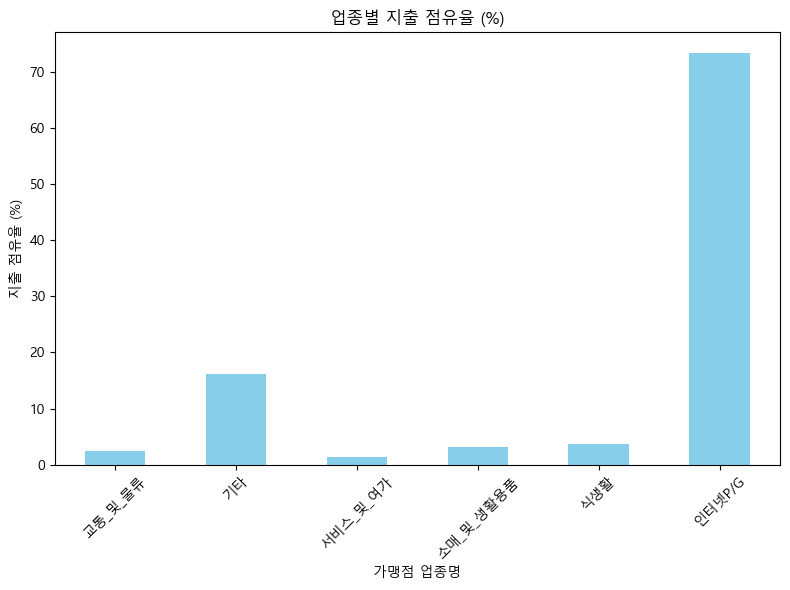

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성

df = pd.DataFrame(final_data_1107)

# 전체 승인금액 계산
total_spending = df['승인금액'].sum()

# 업종별 지출 합계 계산 및 점유율
industry_spending = df.groupby('가맹점업종명_범주화')['승인금액'].sum()
industry_spending_share = (industry_spending / total_spending) * 100

# 시각화
plt.figure(figsize=(8, 6))
industry_spending_share.plot(kind='bar', color='skyblue')
plt.title('업종별 지출 점유율 (%)')
plt.xlabel('가맹점 업종명')
plt.ylabel('지출 점유율 (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

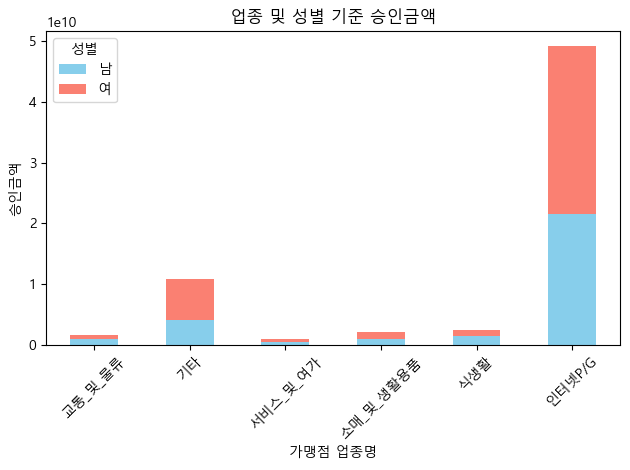

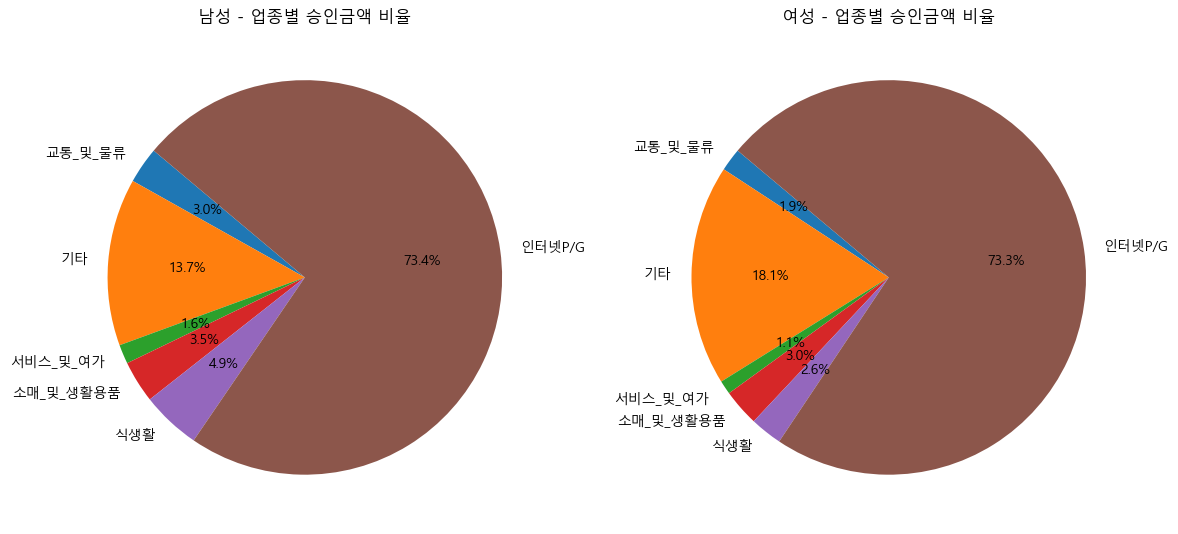

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(final_data_1107)

# 업종별 및 성별로 그룹화하여 승인금액 합계 계산
industry_gender_spending = df.groupby(['가맹점업종명_범주화', '성별'])['승인금액'].sum().unstack()
# 1. 막대 차트 시각화
plt.figure(figsize=(10, 6))
industry_gender_spending.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('업종 및 성별 기준 승인금액')
plt.xlabel('가맹점 업종명')
plt.ylabel('승인금액')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.tight_layout()
plt.show()

# 2. 파이 차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 파이 차트: 성별별 업종 승인금액 비율
# 남성 기준 파이 차트
axes[0].pie(industry_gender_spending['남'], labels=industry_gender_spending.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('남성 - 업종별 승인금액 비율')
# 여성 기준 파이 차트
axes[1].pie(industry_gender_spending['여'], labels=industry_gender_spending.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('여성 - 업종별 승인금액 비율')
plt.tight_layout()
plt.show()

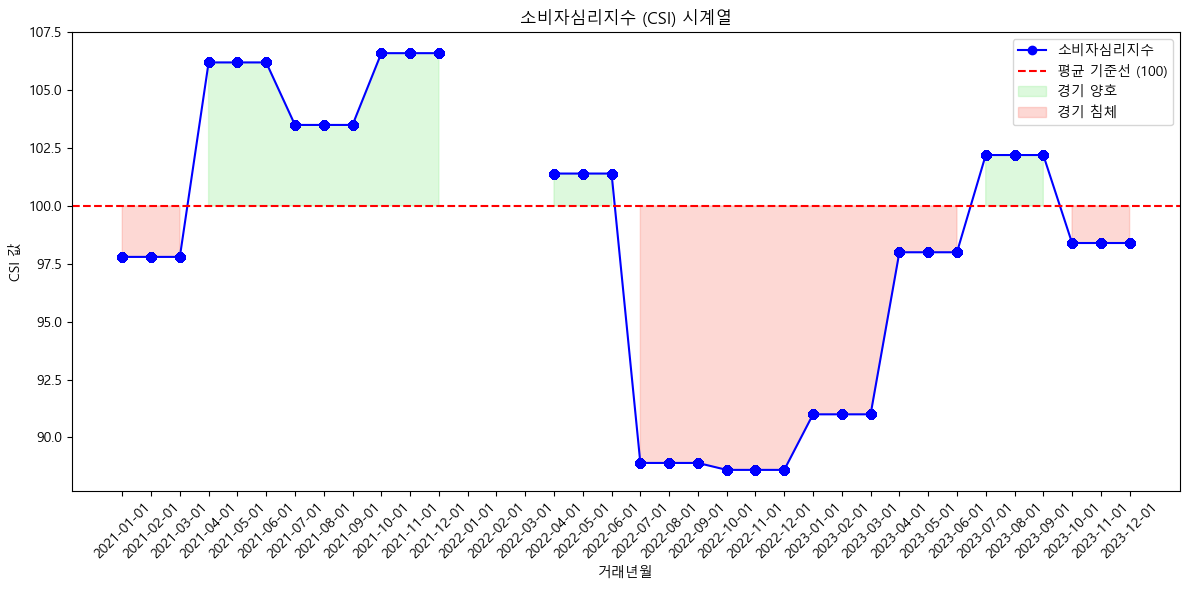


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001F37F400900> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F3023BD080> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = final_data_1107
df = pd.DataFrame(data)

# 평균값 기준선 설정
average_csi = 100

# 1. 소비자심리지수 라인 차트
plt.figure(figsize=(12, 6))
plt.plot(df['거래년월'], df['소비자심리지수'], marker='o', color='b', label='소비자심리지수')
plt.axhline(average_csi, color='r', linestyle='--', label='평균 기준선 (100)')
plt.fill_between(df['거래년월'], df['소비자심리지수'], average_csi,
                 where=(df['소비자심리지수'] >= average_csi), color='lightgreen', alpha=0.3, label='경기 양호')
plt.fill_between(df['거래년월'], df['소비자심리지수'], average_csi,
                 where=(df['소비자심리지수'] < average_csi), color='salmon', alpha=0.3, label='경기 침체')
plt.title('소비자심리지수 (CSI) 시계열')
plt.xlabel('거래년월')
plt.ylabel('CSI 값')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 소비자심리지수 막대 차트
plt.figure(figsize=(12, 6))
colors = ['lightgreen' if x >= average_csi else 'salmon' for x in df['소비자심리지수']]
plt.bar(df['거래년월'], df['소비자심리지수'], color=colors)
plt.axhline(average_csi, color='r', linestyle='--', label='평균 기준선 (100)')
plt.title('소비자심리지수 (CSI) - 막대 차트')
plt.xlabel('거래년월')
plt.ylabel('CSI 값')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# mz

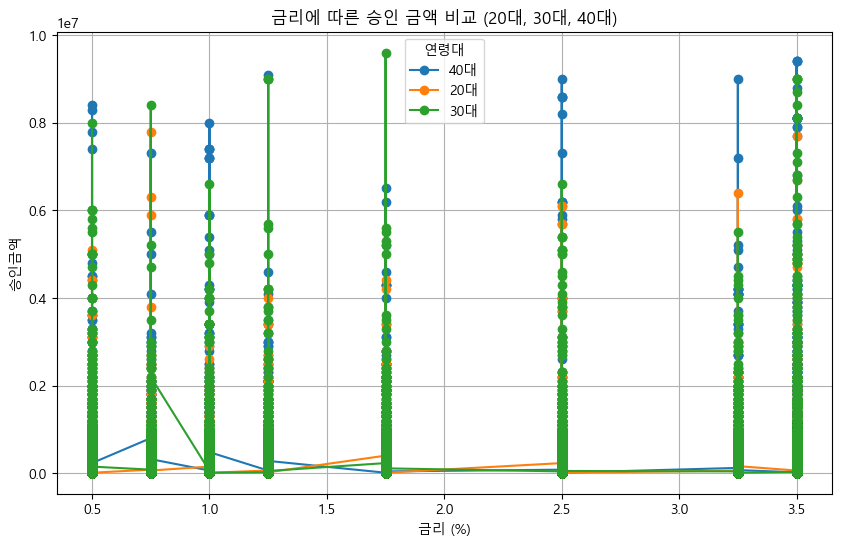

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = final_data_1107
df = pd.DataFrame(data)

# 20대, 30대, 40대만 필터링
df_filtered = df[df['연령대'].isin(['20대', '30대', '40대'])]

# 시각화
plt.figure(figsize=(10, 6))
for age_group in df_filtered['연령대'].unique():
    subset = df_filtered[df_filtered['연령대'] == age_group]
    plt.plot(subset['금리'], subset['승인금액'], marker='o', label=age_group)

plt.title('금리에 따른 승인 금액 비교 (20대, 30대, 40대)')
plt.xlabel('금리 (%)')
plt.ylabel('승인금액')
plt.legend(title='연령대')
plt.grid()
plt.show()


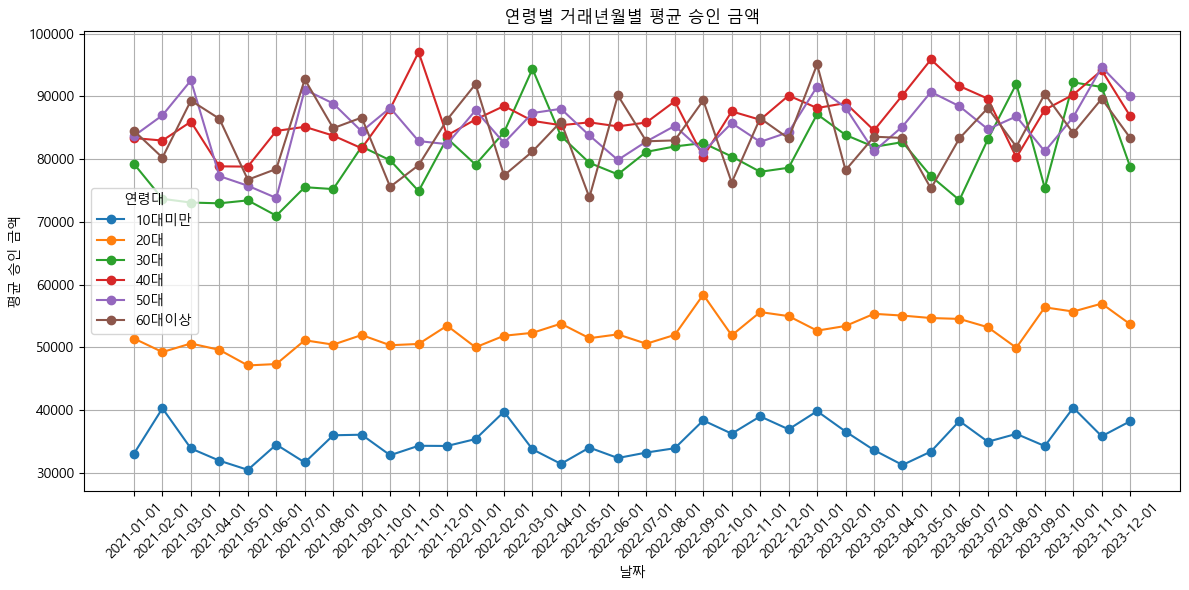

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = final_data_1107
df = pd.DataFrame(data)


# 날짜별, 나이대별 평균 승인 금액 계산
df_grouped = df.groupby(['거래년월', '연령대'])['승인금액'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 6))
for age_group in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[age_group], marker='o', label=age_group)


# 
plt.title('연령별 거래년월별 평균 승인 금액')
plt.xlabel('날짜')
plt.ylabel('평균 승인 금액')
plt.legend(title='연령대')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

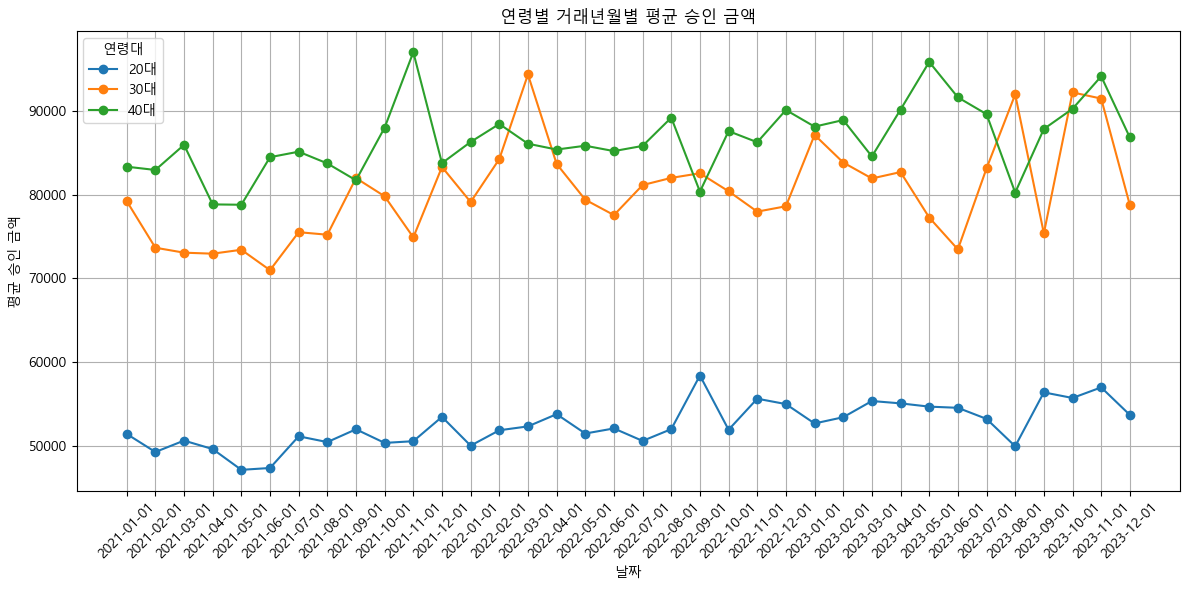

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = final_data_1107
df = pd.DataFrame(data)

# 20대, 30대, 40대만 필터링
df_filtered = df[df['연령대'].isin(['20대', '30대', '40대'])]

# 날짜별, 나이대별 평균 승인 금액 계산
df_grouped = df_filtered.groupby(['거래년월', '연령대'])['승인금액'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 6))
for age_group in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[age_group], marker='o', label=age_group)


# 
plt.title('연령별 거래년월별 평균 승인 금액')
plt.xlabel('날짜')
plt.ylabel('평균 승인 금액')
plt.legend(title='연령대')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

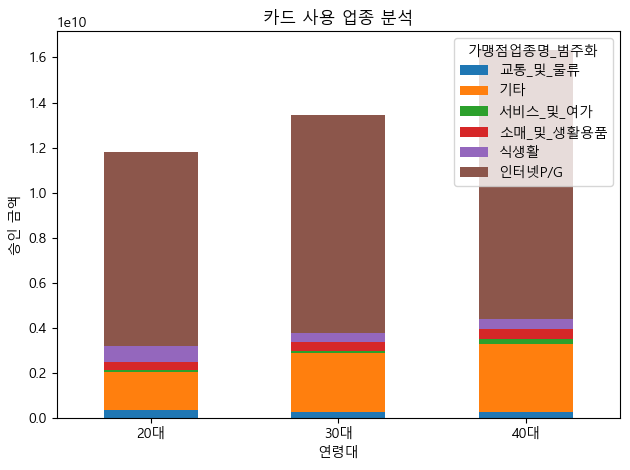

In [21]:
# 예시 데이터 생성
data = final_data_1107

# 20대, 30대, 40대만 필터링
df_filtered = df[df['연령대'].isin(['20대', '30대', '40대'])]

df = pd.DataFrame(df_filtered)

# 시각화
plt.figure(figsize=(10, 6))
df.groupby(['연령대', '가맹점업종명_범주화'])['승인금액'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('카드 사용 업종 분석')
plt.xlabel('연령대')
plt.ylabel('승인 금액')
plt.legend(title='가맹점업종명_범주화')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

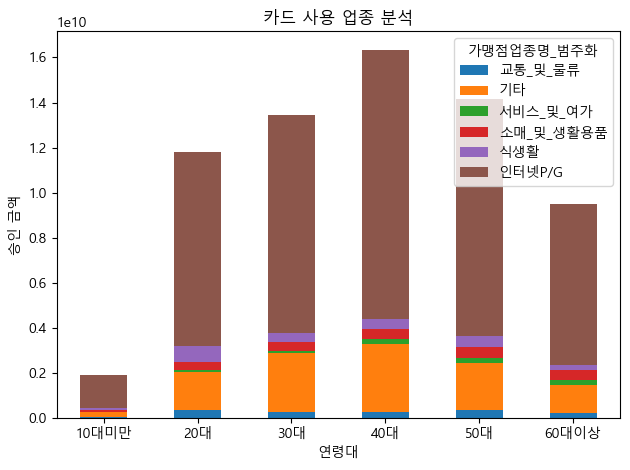

In [26]:
data = final_data_1107
df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))
df.groupby(['연령대', '가맹점업종명_범주화'])['승인금액'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('카드 사용 업종 분석')
plt.xlabel('연령대')
plt.ylabel('승인 금액')
plt.legend(title='가맹점업종명_범주화')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

업종별 승인 금액 비율 (%):
가맹점업종명_범주화
교통_및_물류       2.359263
기타           16.179078
서비스_및_여가      1.323608
소매_및_생활용품     3.207895
식생활           3.602221
인터넷P/G       73.327935
Name: 승인금액, dtype: float64


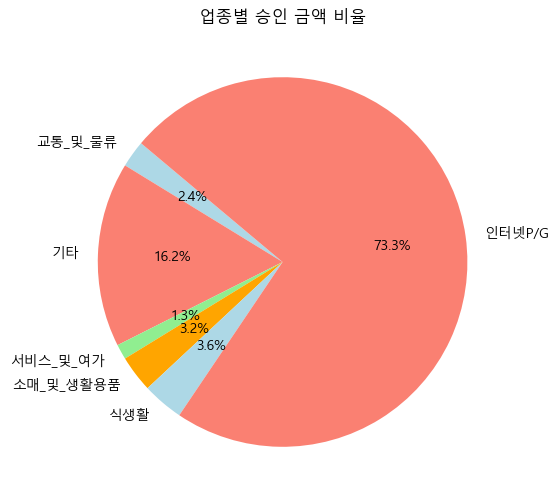

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# 업종별 승인 금액 합계 계산
industry_spending = df.groupby('가맹점업종명_범주화')['승인금액'].sum()

# 전체 승인 금액 대비 업종별 비율 계산
industry_spending_ratio = (industry_spending / industry_spending.sum()) * 100

# 결과 출력
print("업종별 승인 금액 비율 (%):")
print(industry_spending_ratio)

# 시각화
plt.figure(figsize=(10, 6))
industry_spending_ratio.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon', 'lightgreen', 'orange'])
plt.title('업종별 승인 금액 비율')
plt.ylabel('')  # y축 레이블 제거
plt.show()


<Figure size 1000x600 with 0 Axes>

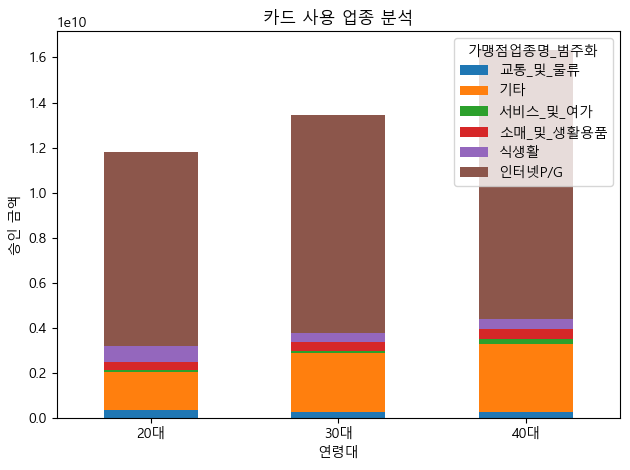

In [27]:
data = final_data_1107
df = pd.DataFrame(data)

df_filtered = df[df['연령대'].isin(['20대', '30대', '40대'])]


# 시각화
plt.figure(figsize=(10, 6))
df_filtered.groupby(['연령대', '가맹점업종명_범주화'])['승인금액'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('카드 사용 업종 분석')
plt.xlabel('연령대')
plt.ylabel('승인 금액')
plt.legend(title='가맹점업종명_범주화')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

업종별 승인 금액 비율 (%):
가맹점업종명_범주화
교통_및_물류       2.217443
기타           17.560726
서비스_및_여가      1.059687
소매_및_생활용품     2.805548
식생활           3.833331
인터넷P/G       72.523266
Name: 승인금액, dtype: float64


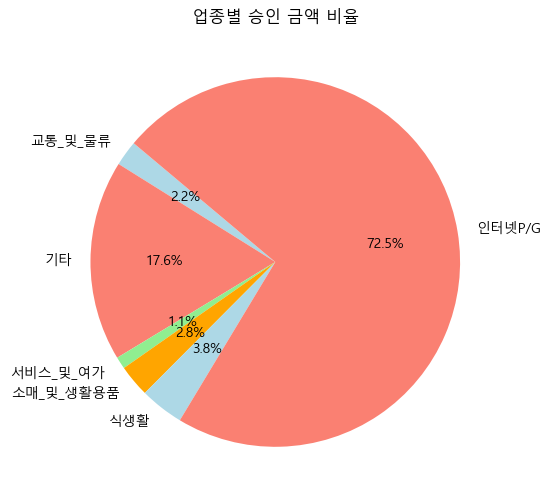

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


data = final_data_1107
df = pd.DataFrame(data)

# 20대, 30대, 40대만 필터링
df_filtered = df[df['연령대'].isin(['20대', '30대', '40대'])]



# 업종별 승인 금액 합계 계산
industry_spending = df_filtered.groupby('가맹점업종명_범주화')['승인금액'].sum()

# 전체 승인 금액 대비 업종별 비율 계산
industry_spending_ratio = (industry_spending / industry_spending.sum()) * 100

# 결과 출력
print("업종별 승인 금액 비율 (%):")
print(industry_spending_ratio)

# 시각화
plt.figure(figsize=(10, 6))
industry_spending_ratio.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon', 'lightgreen', 'orange'])
plt.title('업종별 승인 금액 비율')
plt.ylabel('')  # y축 레이블 제거
plt.show()


In [28]:
df_filtered

,Unnamed: 0,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,...,자택_시도,자택_시군구,승인건수_수치화,거래년월_분기,년도,가맹점업종명_범주화,연도_분기,금리,소비자심리지수,인구
2,2,2021-01-01,7152642392,CATV홈쇼핑,서울특별시,서초구,5번이하,50000,40대,여,...,대구광역시,남구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
6,6,2021-01-01,8263282589,CATV홈쇼핑,서울특별시,마포구,5번이하,40000,40대,남,...,대구광역시,북구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
13,13,2021-01-01,5277853187,CATV홈쇼핑,서울특별시,서초구,5번이하,70000,40대,여,...,대구광역시,달서구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
20,20,2021-01-01,8602235594,CATV홈쇼핑,서울특별시,서초구,5번이하,120000,40대,여,...,대구광역시,달서구,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
25,25,2021-01-01,7276949255,CATV홈쇼핑,서울특별시,강동구,5번이하,60000,40대,여,...,대구광역시,달성군,5,1,2021,기타,2021Q1,0.5,97.8,"서울,경기 아님"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913917,913917,2023-12-01,9479832771,화장품,서울특별시,송파구,5번이하,10000,40대,여,...,대구광역시,수성구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"
913919,913919,2023-12-01,6190146385,화장품,서울특별시,강서구,5번이하,360000,40대,여,...,대구광역시,동구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"
913920,913920,2023-12-01,3817055119,화장품,서울특별시,종로구,5번이하,40000,20대,여,...,대구광역시,북구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"
913921,913921,2023-12-01,4270547815,화장품,서울특별시,송파구,5번이하,10000,20대,여,...,대구광역시,달성군,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님"


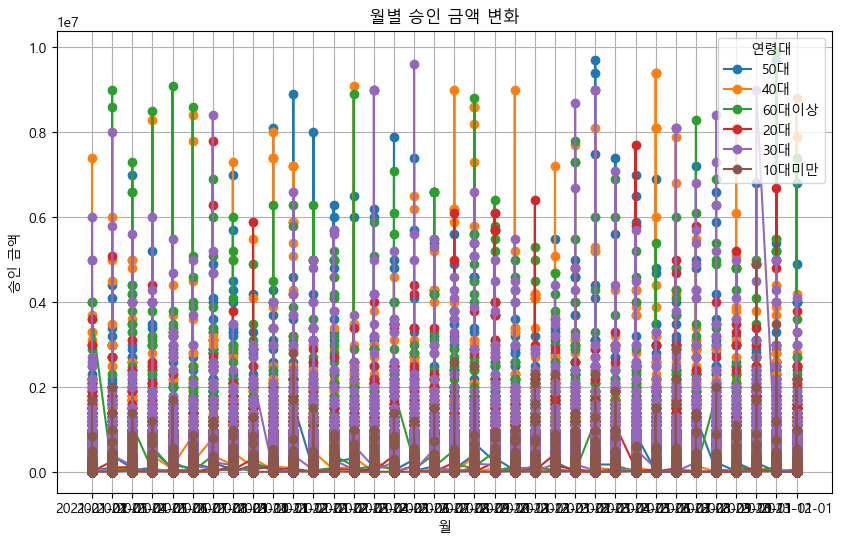

In [35]:
# 예시 데이터 생성
data = final_data_1107
df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))
for age_group in df['연령대'].unique():
    subset = df[df['연령대'] == age_group]
    plt.plot(subset['거래년월'], subset['승인금액'], marker='o', label=age_group)

plt.title('월별 승인 금액 변화')
plt.xlabel('월')
plt.ylabel('승인 금액')
plt.legend(title='연령대')
plt.grid()
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = final_data_1107
df = pd.DataFrame(data)

# 나이대별, 업종별 승인 금액 합계 계산
age_industry_spending = df.groupby(['연령대', '가맹점업종명_범주화'])['승인금액'].sum()

# 나이대별 승인 금액 합계로 각 업종 비율 계산
age_industry_ratio = age_industry_spending.groupby(level=0).apply(lambda x: (x / x.sum()) * 100)

# 결과 출력
print("나이대별 업종별 승인 금액 비율 (%):")
print(age_industry_ratio)

나이대별 업종별 승인 금액 비율 (%):
연령대    연령대    가맹점업종명_범주화
10대미만  10대미만  교통_및_물류        3.229764
              기타            11.340201
              서비스_및_여가       1.252017
              소매_및_생활용품      2.777096
              식생활            5.814725
              인터넷P/G        75.586198
20대    20대    교통_및_물류        3.095303
              기타            14.187977
              서비스_및_여가       0.980923
              소매_및_생활용품      2.981262
              식생활            5.999661
              인터넷P/G        72.754875
30대    30대    교통_및_물류        1.934334
              기타            19.493466
              서비스_및_여가       0.960689
              소매_및_생활용품      2.738718
              식생활            3.044774
              인터넷P/G        71.828019
40대    40대    교통_및_물류        1.816470
              기타            18.406757
              서비스_및_여가       1.197903
              소매_및_생활용품      2.733641
              식생활            2.917736
              인터넷P/G        72.927492
50대    50대    교통_및_물류        2.700514
  

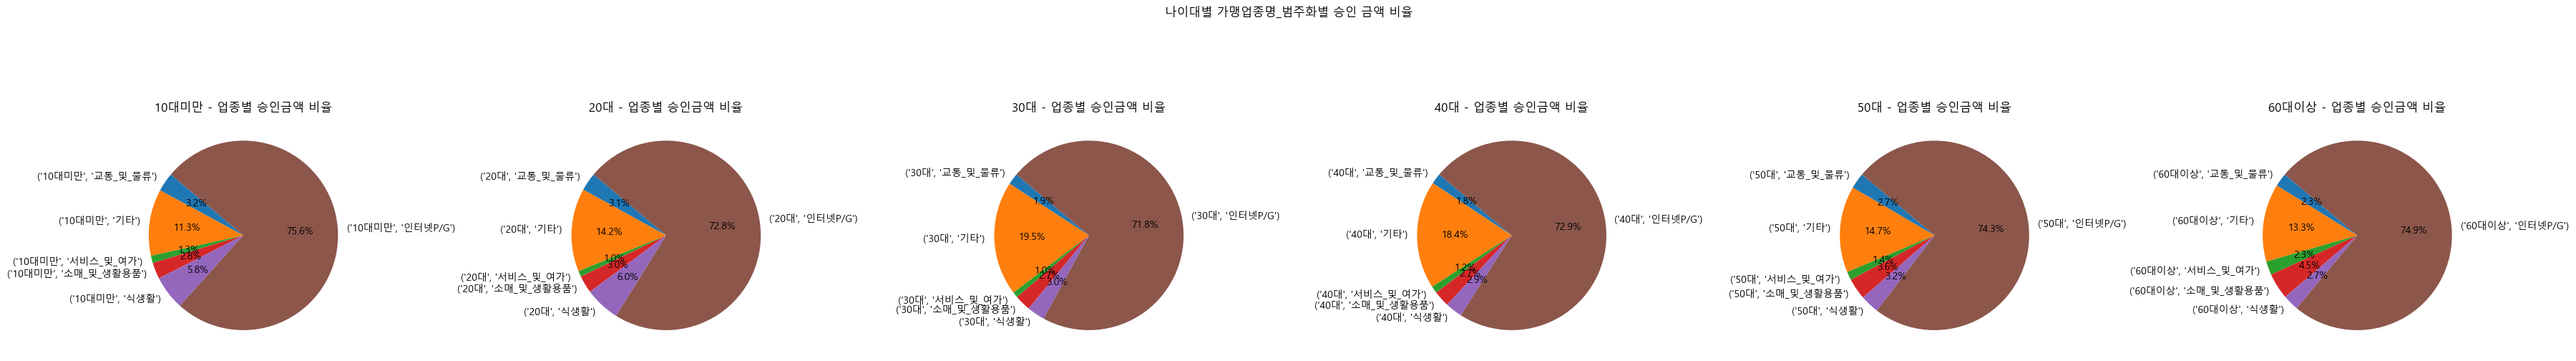

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = final_data_1107
df = pd.DataFrame(data)

# 나이대별, 업종별 승인 금액 합계 계산
age_industry_spending = df.groupby(['연령대', '가맹점업종명_범주화'])['승인금액'].sum()

# 나이대별 승인 금액 합계로 각 업종 비율 계산
age_industry_ratio = age_industry_spending.groupby(level=0).apply(lambda x: (x / x.sum()) * 100)

# 나이대별 고유 값 추출
age_groups = age_industry_ratio.index.levels[0]

# 시각화
fig, axes = plt.subplots(1, len(age_groups), figsize=(6 * len(age_groups), 6), sharey=True)

# 나이대별 파이 차트 생성
if len(age_groups) == 1:
    # 나이대가 하나일 경우
    axes.pie(age_industry_ratio[age_groups[0]], labels=age_industry_ratio[age_groups[0]].index, autopct='%1.1f%%', startangle=140)
    axes.set_title(f'{age_groups[0]} - 업종별 승인금액 비율')
else:
    # 나이대가 여러 개일 경우
    for i, age_group in enumerate(age_groups):
        axes[i].pie(age_industry_ratio[age_group], labels=age_industry_ratio[age_group].index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{age_group} - 업종별 승인금액 비율')

plt.suptitle('나이대별 가맹업종명_범주화별 승인 금액 비율')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [41]:
final_data_1107.columns

Index(['Unnamed: 0', '거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수',
       '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구', '승인건수_수치화', '거래년월_분기',
       '년도', '가맹점업종명_범주화', '연도_분기', '금리', '소비자심리지수', '인구'],
      dtype='object')

C:\Users\campus3S013\AppData\Local\Temp\ipykernel_19276\1942406236.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stable_groups = monthly_data.groupby('연령대').apply(lambda x: x['승인금액_변화율'].abs().mean()).sort_values()


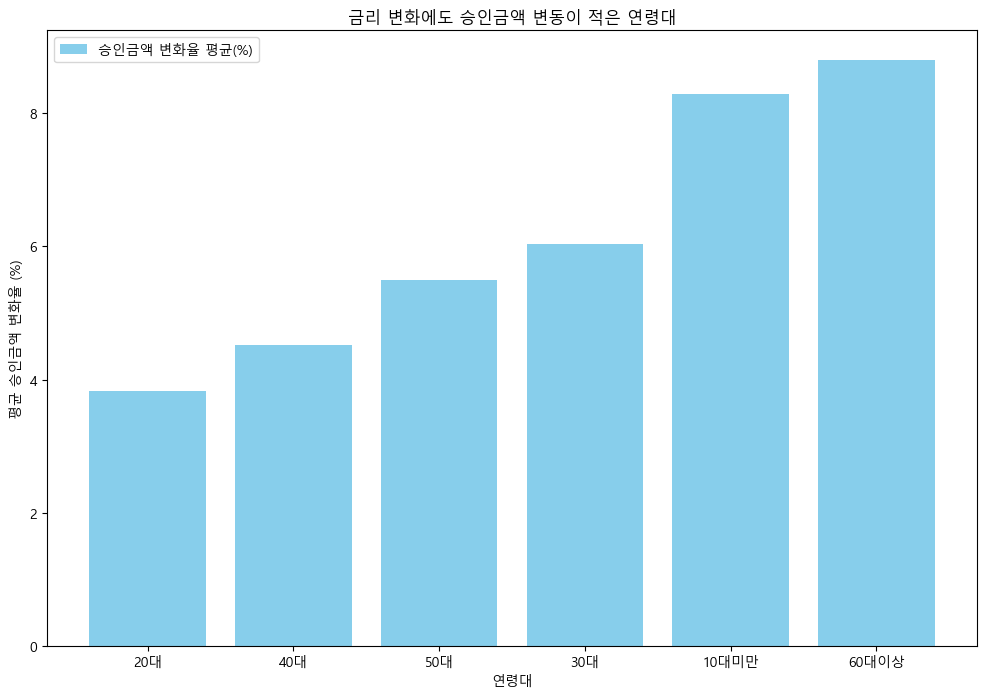

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


data = final_data_1107

# 월별 평균 금리와 승인금액 계산
monthly_data = data.groupby(['연령대', '거래년월'])[['승인금액', '금리']].mean().reset_index()

# 금리 변화에 따른 승인금액 변화율 계산 (월별 % 변화율)
monthly_data['승인금액_변화율'] = monthly_data.groupby('연령대')['승인금액'].pct_change() * 100
monthly_data['금리_변화율'] = monthly_data.groupby('연령대')['금리'].pct_change() * 100

# 금리 변화에도 승인금액 변화율이 적은 연령대 식별
#stable_groups = monthly_data.groupby('연령대').apply(lambda x: x['승인금액_변화율'].abs().mean())
stable_groups = monthly_data.groupby('연령대').apply(lambda x: x['승인금액_변화율'].abs().mean()).sort_values()

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 연령대별 금리 변화율과 승인금액 변화율 평균을 보여주는 바 차트
ax1.bar(stable_groups.index, stable_groups.values, color='skyblue', label='승인금액 변화율 평균(%)')
ax1.set_xlabel('연령대')
ax1.set_ylabel('평균 승인금액 변화율 (%)')
ax1.set_title('금리 변화에도 승인금액 변동이 적은 연령대')
ax1.legend(loc='upper left')

'''
# 금리 변화율과 함께 비교하기 위해, 두 번째 y축 설정
ax2 = ax1.twinx()
ax2.plot(monthly_data['거래년월'].unique(), monthly_data.groupby('거래년월')['금리'].mean(), color='orange', label='월별 평균 금리')
ax2.set_ylabel('기준금리 (%)')
ax2.legend(loc='upper right')
'''

plt.show()


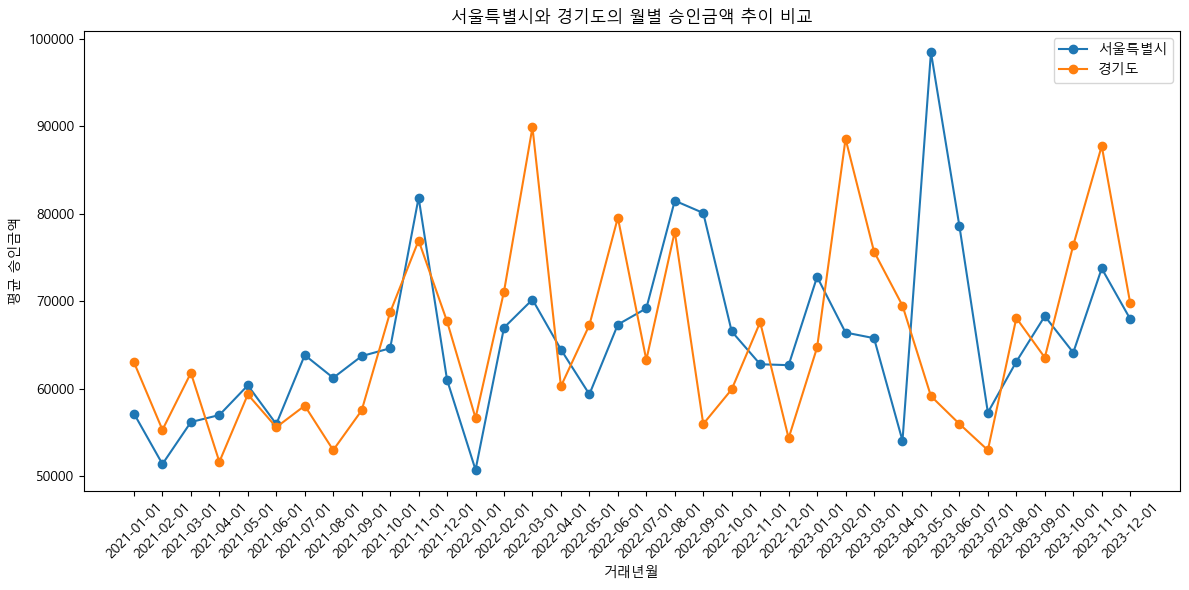

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
data = final_data_1107

# 서울특별시와 경기도 데이터 필터링
seoul_data = data[data['자택_시도'] == "서울특별시"]
gyeonggi_data = data[data['자택_시도'] == "경기도"]

# 월별 승인금액 평균 계산
seoul_monthly = seoul_data.groupby('거래년월')['승인금액'].mean().reset_index()
gyeonggi_monthly = gyeonggi_data.groupby('거래년월')['승인금액'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))

# 서울특별시 승인금액 추이
plt.plot(seoul_monthly['거래년월'], seoul_monthly['승인금액'], label='서울특별시', marker='o')

# 경기도 승인금액 추이
plt.plot(gyeonggi_monthly['거래년월'], gyeonggi_monthly['승인금액'], label='경기도', marker='o')

# 그래프 세부 설정
plt.xlabel('거래년월')
plt.ylabel('평균 승인금액')
plt.title('서울특별시와 경기도의 월별 승인금액 추이 비교')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

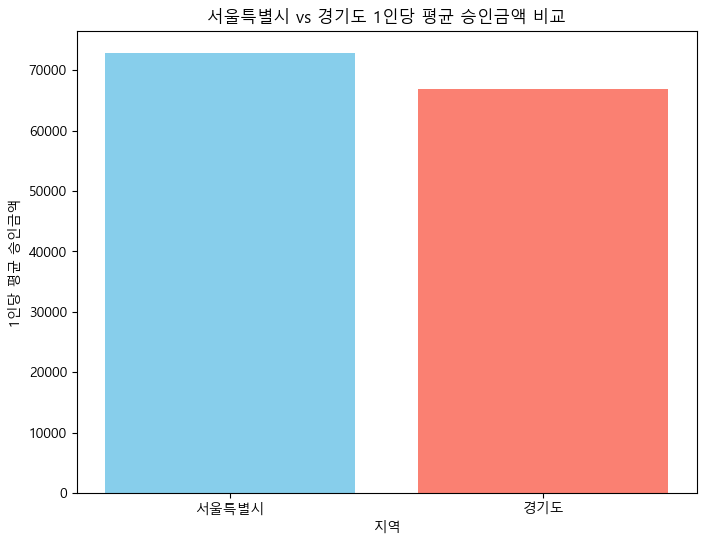

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

data = final_data_1107

# 서울특별시와 경기도 데이터 필터링
seoul_data = data[data['자택_시도'] == "서울특별시"]
gyeonggi_data = data[data['자택_시도'] == "경기도"]

# 1인당 평균 승인금액 계산
seoul_avg_per_person = seoul_data.groupby('고객ID')['승인금액'].mean().mean()
gyeonggi_avg_per_person = gyeonggi_data.groupby('고객ID')['승인금액'].mean().mean()

# 결과를 데이터프레임으로 정리
avg_data = pd.DataFrame({
    '지역': ['서울특별시', '경기도'],
    '1인당 평균 승인금액': [seoul_avg_per_person, gyeonggi_avg_per_person]
})

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(avg_data['지역'], avg_data['1인당 평균 승인금액'], color=['skyblue', 'salmon'])
plt.xlabel('지역')
plt.ylabel('1인당 평균 승인금액')
plt.title('서울특별시 vs 경기도 1인당 평균 승인금액 비교')
plt.show()


C:\Users\campus3S013\AppData\Local\Temp\ipykernel_19276\22632921.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['거래년월'] = pd.to_datetime(filtered_data['거래년월'])


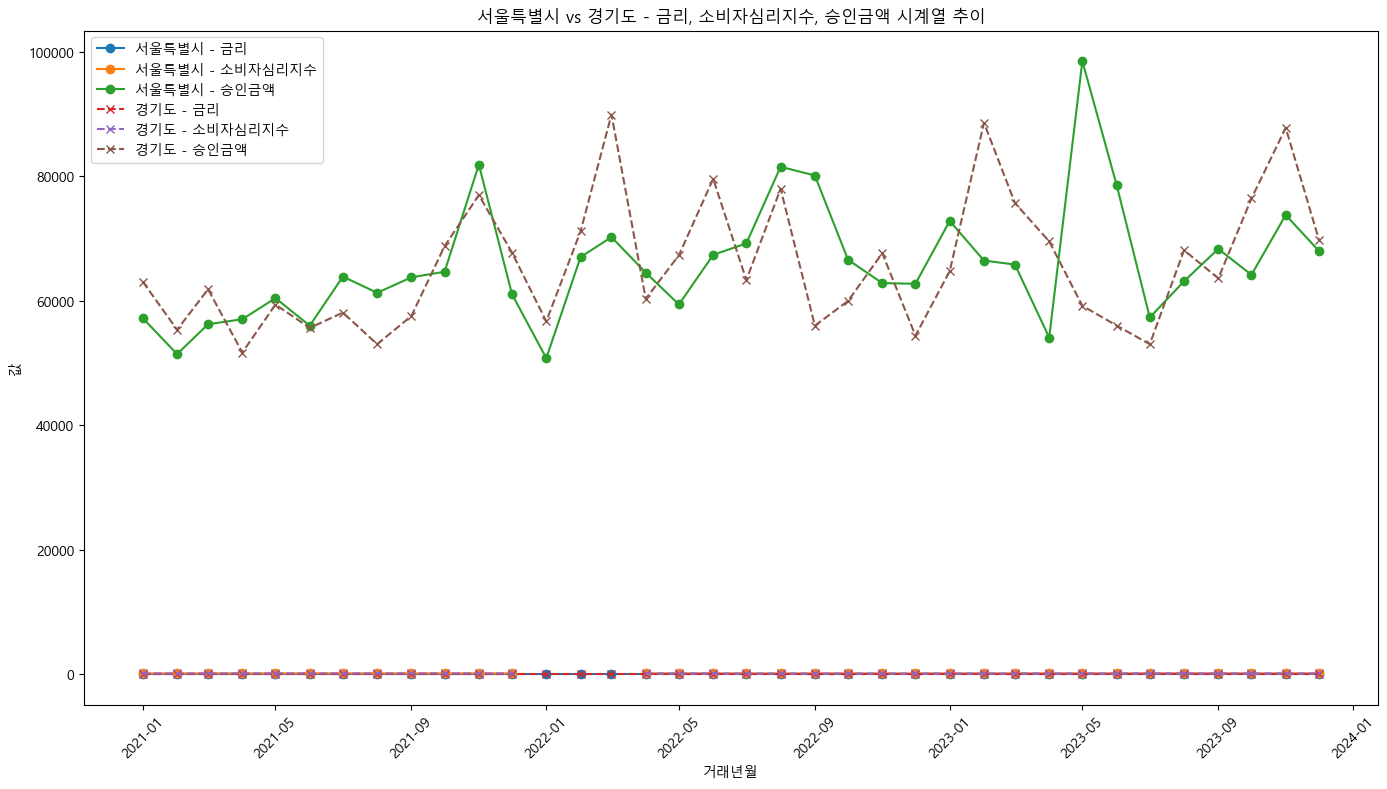

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = final_data_1107

# '자택_시도'가 "서울특별시" 또는 "경기도"인 경우만 필터링
filtered_data = data[data['자택_시도'].isin(["서울특별시", "경기도"])]

# '거래년월'을 datetime 형식으로 변환
#filtered_data['거래년월'] = pd.to_datetime(filtered_data['거래년월'], format='%Y-%m')
filtered_data['거래년월'] = pd.to_datetime(filtered_data['거래년월'])

# 지역과 월별로 '금리', '소비자심리지수', '승인금액'의 평균 계산
monthly_data = filtered_data.groupby(['자택_시도', '거래년월'])[['금리', '소비자심리지수', '승인금액']].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 8))

# 서울특별시 시계열 그래프
seoul_data = monthly_data[monthly_data['자택_시도'] == '서울특별시']
plt.plot(seoul_data['거래년월'], seoul_data['금리'], label='서울특별시 - 금리', linestyle='-', marker='o')
plt.plot(seoul_data['거래년월'], seoul_data['소비자심리지수'], label='서울특별시 - 소비자심리지수', linestyle='-', marker='o')
plt.plot(seoul_data['거래년월'], seoul_data['승인금액'], label='서울특별시 - 승인금액', linestyle='-', marker='o')

# 경기도 시계열 그래프
gyeonggi_data = monthly_data[monthly_data['자택_시도'] == '경기도']
plt.plot(gyeonggi_data['거래년월'], gyeonggi_data['금리'], label='경기도 - 금리', linestyle='--', marker='x')
plt.plot(gyeonggi_data['거래년월'], gyeonggi_data['소비자심리지수'], label='경기도 - 소비자심리지수', linestyle='--', marker='x')
plt.plot(gyeonggi_data['거래년월'], gyeonggi_data['승인금액'], label='경기도 - 승인금액', linestyle='--', marker='x')

# 그래프 세부 설정
plt.xlabel('거래년월')
plt.ylabel('값')
plt.title('서울특별시 vs 경기도 - 금리, 소비자심리지수, 승인금액 시계열 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


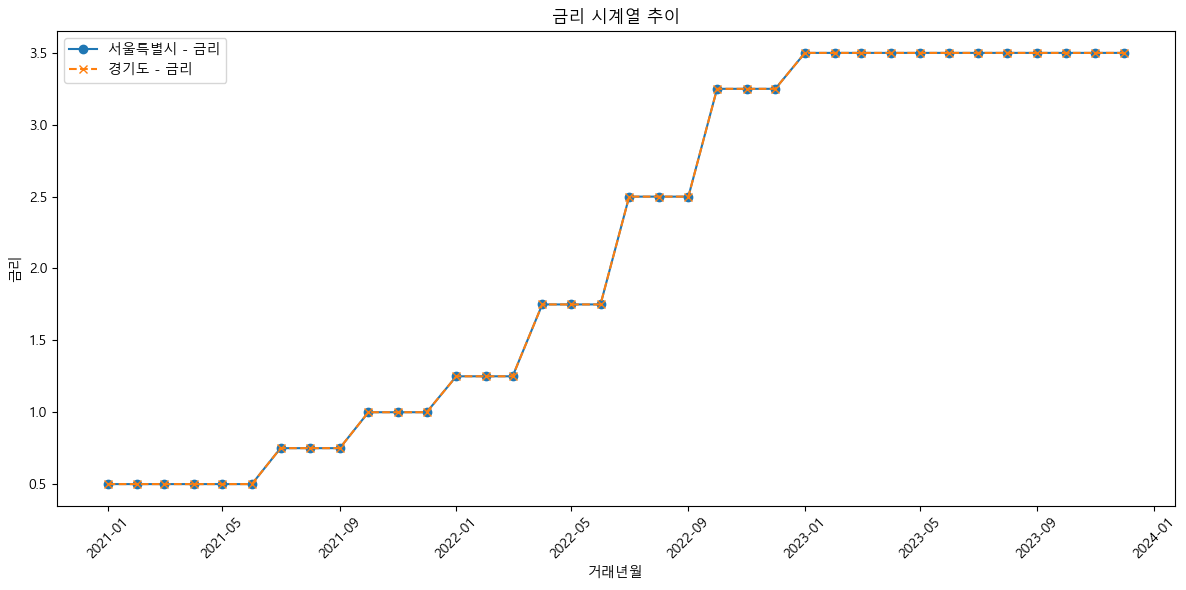

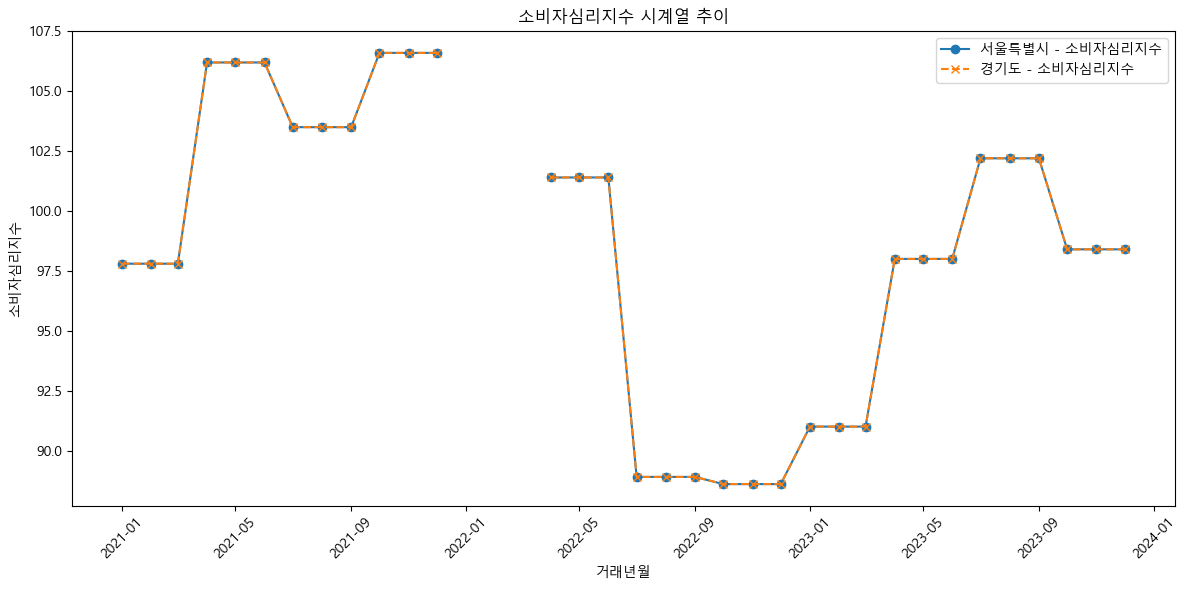

In [56]:
# 시각화 - 금리
plt.figure(figsize=(12, 6))
plt.plot(seoul_data['거래년월'], seoul_data['금리'], label='서울특별시 - 금리', linestyle='-', marker='o')
plt.plot(gyeonggi_data['거래년월'], gyeonggi_data['금리'], label='경기도 - 금리', linestyle='--', marker='x')
plt.xlabel('거래년월')
plt.ylabel('금리')
plt.title('금리 시계열 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 - 소비자심리지수
plt.figure(figsize=(12, 6))
plt.plot(seoul_data['거래년월'], seoul_data['소비자심리지수'], label='서울특별시 - 소비자심리지수', linestyle='-', marker='o')
plt.plot(gyeonggi_data['거래년월'], gyeonggi_data['소비자심리지수'], label='경기도 - 소비자심리지수', linestyle='--', marker='x')
plt.xlabel('거래년월')
plt.ylabel('소비자심리지수')
plt.title('소비자심리지수 시계열 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

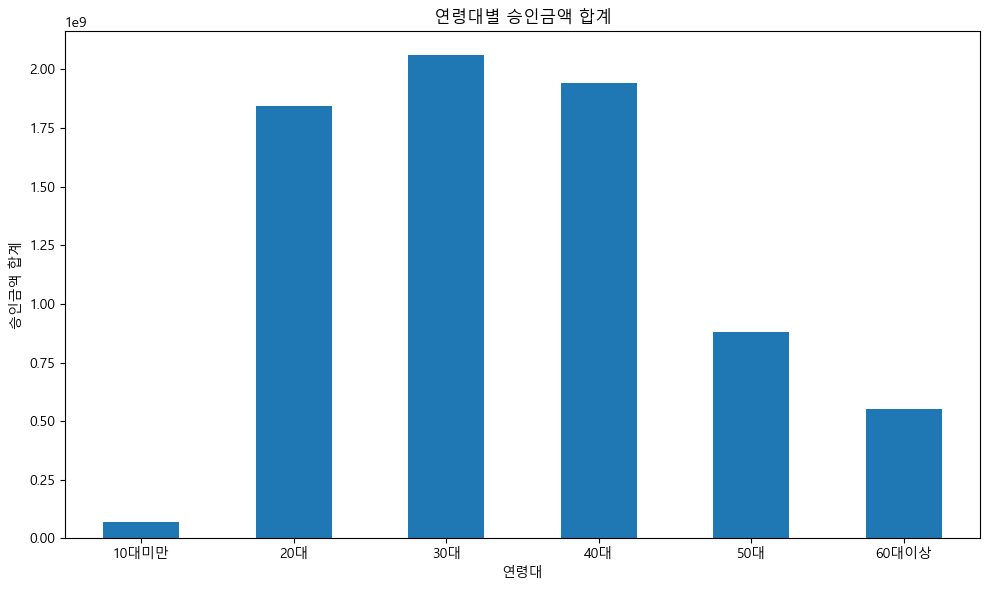

In [66]:
# '자택_시도'가 "서울특별시" 또는 "경기도"인 경우만 필터링
filtered_data = data[data['자택_시도'].isin(["서울특별시", "경기도"])]

# 연령대별 승인금액 합계 계산
age_group_sum = filtered_data.groupby('연령대')['승인금액'].sum()

# 시각화
plt.figure(figsize=(10, 6))
age_group_sum.plot(kind='bar')
plt.xlabel('연령대')
plt.ylabel('승인금액 합계')
plt.title('연령대별 승인금액 합계')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

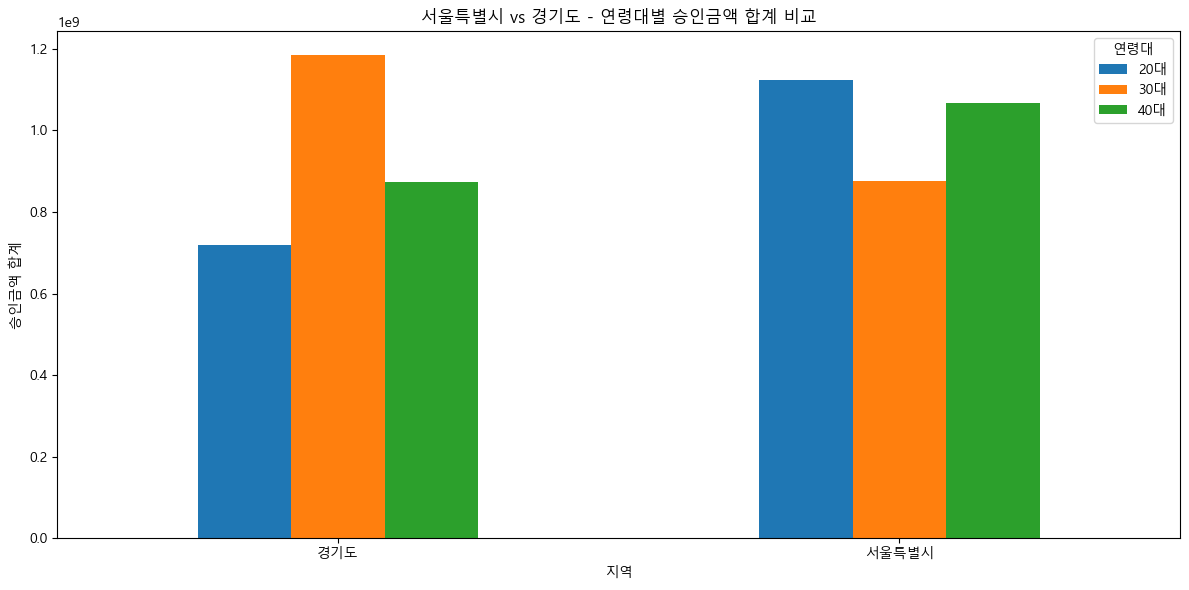

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
data = final_data_1107

# '자택_시도'가 "서울특별시" 또는 "경기도"인 경우만 필터링
filtered_data = data[data['자택_시도'].isin(["서울특별시", "경기도"])]

df_filtered = filtered_data[filtered_data['연령대'].isin(['20대', '30대', '40대'])]

# 지역별 및 연령대별 승인금액 합계 계산
age_group_sum = df_filtered.groupby(['자택_시도', '연령대'])['승인금액'].sum().unstack()

# 시각화
age_group_sum.plot(kind='bar', figsize=(12, 6))
plt.xlabel('지역')
plt.ylabel('승인금액 합계')
plt.title('서울특별시 vs 경기도 - 연령대별 승인금액 합계 비교')
plt.legend(title='연령대')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
mport pandas as pd
import matplotlib.pyplot as plt
data = final_data_1107

# '자택_시도'가 "서울특별시" 또는 "경기도"인 경우만 필터링
filtered_data = data[data['자택_시도'].isin(["서울특별시", "경기도"])]

# 지역별 및 연령대별 승인금액 합계 계산
age_group_sum = filtered_data.groupby(['자택_시도', '연령대'])['승인금액'].sum().unstack()

# 시각화
age_group_sum.plot(kind='bar', figsize=(12, 6))
plt.xlabel('지역')
plt.ylabel('승인금액 합계')
plt.title('서울특별시 vs 경기도 - 연령대별 승인금액 합계 비교')
plt.legend(title='연령대')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

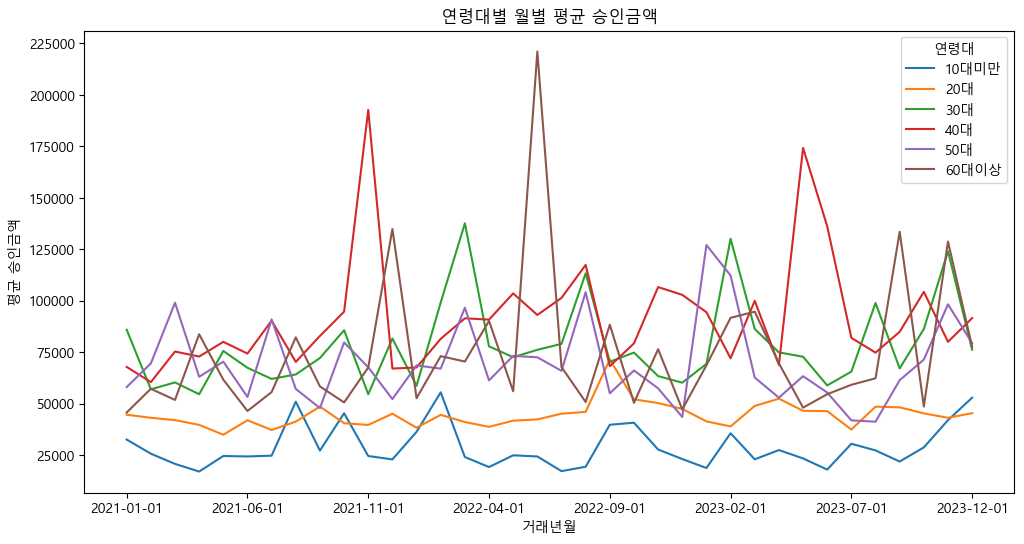

In [67]:
data = final_data_1107

# '자택_시도'가 "서울특별시" 또는 "경기도"인 경우만 필터링
filtered_data = data[data['자택_시도'].isin(["서울특별시", "경기도"])]


monthly_avg = filtered_data.groupby(['연령대', '거래년월'])['승인금액'].mean().unstack()
monthly_avg.T.plot(figsize=(12, 6))
plt.title('연령대별 월별 평균 승인금액')
plt.xlabel('거래년월')
plt.ylabel('평균 승인금액')
plt.legend(title='연령대')
plt.show()


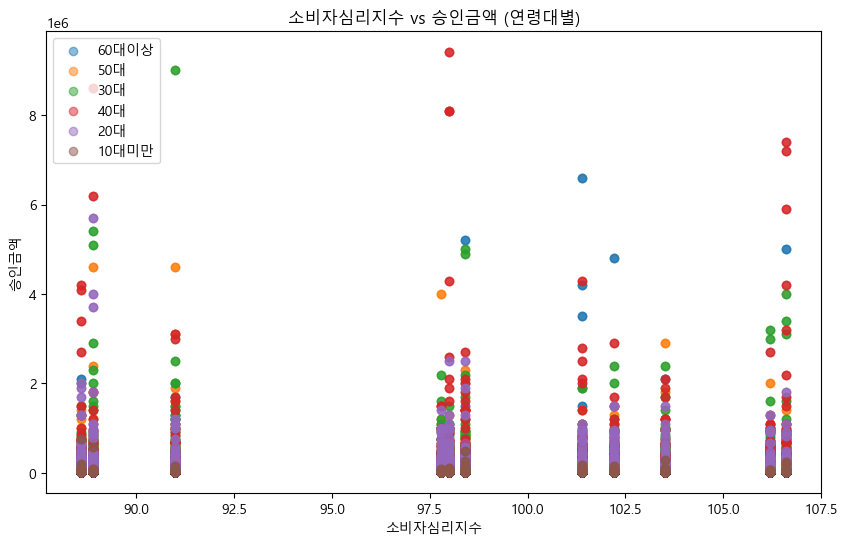

In [72]:
data = final_data_1107

# '자택_시도'가 "서울특별시" 또는 "경기도"인 경우만 필터링
filtered_data = data[data['자택_시도'].isin(["서울특별시", "경기도"])]

plt.figure(figsize=(10, 6))
for age in filtered_data['연령대'].unique():
    age_data = filtered_data[filtered_data['연령대'] == age]
    plt.scatter(age_data['소비자심리지수'], age_data['승인금액'], label=f'{age}', alpha=0.5)
    #plt.scatter(age_data['승인금액'], age_data['소비자심리지수'], label=f'{age}대', alpha=0.5)
    
plt.title('소비자심리지수 vs 승인금액 (연령대별)')

plt.xlabel('소비자심리지수')
plt.ylabel('승인금액')


plt.legend()
plt.show()


In [81]:
'''
import pandas as pd
import matplotlib.pyplot as plt

data = final_data_1107

# 연령대와 거래년월별 승인건수 합계 계산
monthly_count = data.groupby(['연령대', '거래년월'])['승인건수'].sum().unstack()

# 시각화
plt.figure(figsize=(12, 8))

for age in data['연령대'].unique():
    plt.plot(monthly_count.columns, monthly_count.loc[age], label=f'{age}대')

plt.xlabel('거래년월')
plt.ylabel('승인건수 합계')
plt.title('연령대별 거래년월에 따른 승인건수 추이')
plt.legend(title='연령대')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('age_group_trends.png')
print("저장됨")
#plt.show()
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\ndata = final_data_1107\n\n# 연령대와 거래년월별 승인건수 합계 계산\nmonthly_count = data.groupby([\'연령대\', \'거래년월\'])[\'승인건수\'].sum().unstack()\n\n# 시각화\nplt.figure(figsize=(12, 8))\n\nfor age in data[\'연령대\'].unique():\n    plt.plot(monthly_count.columns, monthly_count.loc[age], label=f\'{age}대\')\n\nplt.xlabel(\'거래년월\')\nplt.ylabel(\'승인건수 합계\')\nplt.title(\'연령대별 거래년월에 따른 승인건수 추이\')\nplt.legend(title=\'연령대\')\nplt.xticks(rotation=45)\nplt.tight_layout()\n\nplt.savefig(\'age_group_trends.png\')\nprint("저장됨")\n#plt.show()\n'

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
data = final_data_1107

# 1%만 뽑음 너무 크다고 해서...
sampled_df = data.sample(frac=0.01, random_state=42)


# '거래년월'을 datetime 형식으로 변환
#data['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m')

# 거래년월별 모든 연령대 승인건수 총합 계산
monthly_total_count = sampled_df.groupby('거래년월')['승인건수'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_count.index, monthly_total_count.values, marker='o')
plt.xlabel('거래년월')
plt.ylabel('승인건수 총합')
plt.title('거래년월별 승인건수 총합 추이')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: 'method' object is not subscriptable

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


data = final_data_1107
sampled_df = data.sample(frac=0.01, random_state=42)
data.head()
'''
# 1% 샘플링
sampled_df = data.sample(frac=0.01, random_state=42)

# '거래년월'을 datetime 형식으로 변환
#sampled_df['거래년월'] = pd.to_datetime(sampled_df['거래년월'], format='%Y-%m-%d')

# 거래년월별 연령대별 승인건수 총합 계산 (pivot table 사용)
monthly_age_count = sampled_df.pivot_table(index='거래년월', columns='연령대', values='승인건수', aggfunc='sum')
monthly_age_count.head()
'''
sampled_df.head()

# 거래년월별 연령대별 승인건수 총합 계산 (pivot table 사용)
monthly_age_count = sampled_df.pivot_table(index='거래년월', columns='연령대', values='승인건수', aggfunc='sum')
monthly_age_count.head()

연령대,10대미만,20대,30대,40대,50대,60대이상
거래년월,,,,,,
2021-01-01,5번이하5번이하5번초과 10번이하5번이하5번이하5번이하5번이하5번이하,5번이하5번이하5번이하5번이하5번이하5번이하5번초과 10번이하5번이하5번이하5번이하...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...
2021-02-01,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번초과 10번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하10번초과 15번이...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...
2021-03-01,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하20번 초과5번이하5번이하5번이하...
2021-04-01,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번초과 10번이하5번이하5번이하5번초과 10번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번초과 10번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...
2021-05-01,5번이하5번이하10번초과 15번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번초과 10번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...,5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번이하5번...


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
data = final_data_1107

# '거래년월'을 datetime 형식으로 변환
data['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')

# 거래년월과 연령대별 승인건수 총합 계산
monthly_age_group_count = data.groupby(['거래년월', '연령대'])['승인건수'].sum().unstack()

# 시각화
plt.figure(figsize=(14, 8))

for age in monthly_age_group_count.columns:
    plt.plot(monthly_age_group_count.index, monthly_age_group_count[age], label=f'{age}대', marker='o')

plt.xlabel('거래년월')
plt.ylabel('승인건수 총합')
plt.title('거래년월별 연령대별 승인건수 총합 추이')
plt.legend(title='연령대')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\campus3S013\AppData\Local\Temp\ipykernel_19276\1440768621.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 363734x731 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1400x800 with 1 Axes>